#Part A: Basic SVM with Linear Kernel

In [ ]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

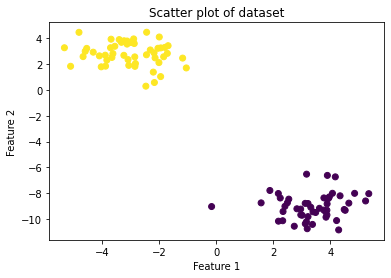

In [ ]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=51)

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of dataset")
plt.show()

In [ ]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=51)

In [ ]:
print(X_train, X_test, Y_train, Y_test)

[[  3.88141188  -8.43348641]
 [ -3.6576858    2.49824671]
 [  2.40505374  -9.0018579 ]
 [  4.84699459  -7.99877831]
 [  4.07014922  -7.99476329]
 [ -3.70664058   3.24865091]
 [ -3.68744622   3.908274  ]
 [ -3.55582273   3.36005614]
 [  3.88325258  -8.81124973]
 [  3.61456119  -9.15374746]
 [  3.31061373  -9.07207392]
 [ -2.98655087   3.65432555]
 [ -2.20736449   1.36492929]
 [ -4.03170817   1.77338307]
 [ -4.09738072   2.62007182]
 [ -3.12465026   3.76499607]
 [  4.2879008  -10.82406204]
 [  2.24152893  -8.35897332]
 [  3.37038905 -10.39853633]
 [ -2.83407994   2.02785546]
 [ -2.4469826    2.70262598]
 [ -2.14542128   2.46462846]
 [ -2.00993731   2.10054124]
 [  3.18638264 -10.73097147]
 [ -2.46813518   0.27920609]
 [ -1.05127901   1.6874449 ]
 [ -3.83482008   2.29092925]
 [ -1.99809914   4.07765888]
 [ -3.2314964    3.78540505]
 [  2.17401576  -8.01113911]
 [  4.21521768 -10.1020808 ]
 [ -2.89582322   3.92911383]
 [  3.9321122   -8.38801167]
 [  3.1186269  -10.34603798]
 [  4.48230992

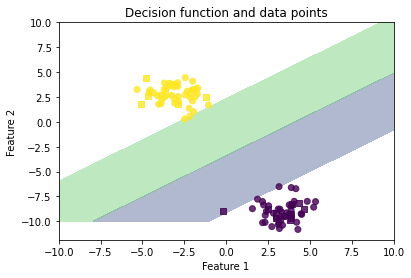

In [ ]:
# train a support vector machine (SVM) classifier on the training set
clf = svm.SVC(kernel='linear', random_state=51)
clf.fit(X_train, Y_train)

# define a function to plot the decision function on training and test data
def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    # create a meshgrid of points to evaluate the decision function
    xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
    xy = np.column_stack([xx.ravel(), yy.ravel()])

    # calculate the decision function on the meshgrid points
    Z = clf.decision_function(xy).reshape(xx.shape)

    # plot the decision function and the training/test data
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', alpha=0.8)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision function and data points")
    plt.show()

plot_decision_function(X_train, Y_train, X_test, Y_test, clf)

In [ ]:
clf_predictions = clf.predict(X_test)
clf_predictions

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = clf.score(X_test, Y_test)
print("Accuracy: {}%".format(accuracy * 100))

Accuracy: 100.0%


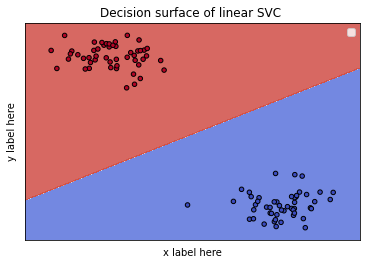

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#Part B : Breast Cancer Prediction Example


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Shape of feature data:  (569, 30)
Cancer labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1

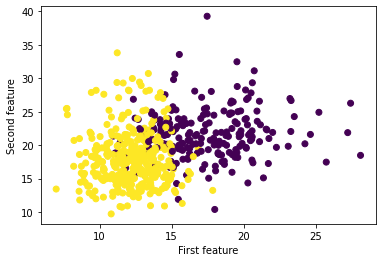

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets

# Load dataset
cancer = datasets.load_breast_cancer()

# Print the names of the 13 features
print("Features: ", cancer.feature_names)

# Print the label type of cancer ('malignant' 'benign')
print("Labels: ", cancer.target_names)

# Print the shape of the feature data
print("Shape of feature data: ", cancer.data.shape)

# Print the cancer labels (0:malignant, 1:benign)
print("Cancer labels: ", cancer.target)

# Plotting scatters
plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c=cancer.target)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

# Load dataset
cancer = datasets.load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

# Create a SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_pred)

[1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1
 1 0 0]


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9385964912280702


In [ ]:
# Model Precision: what percentage of positive tuples are,labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.9295774647887324


In [ ]:
# Model Recall: what percentage of positive tuples are,labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9705882352941176


#Exercise

In [ ]:
# 1.Implement SVM classifier on MNIST dataset, compare the performance of linear, poly-nomial and RBF kernels.
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifiers with linear, polynomial, and RBF kernels
linear_clf = SVC(kernel='linear')
poly_clf = SVC(kernel='poly')
rbf_clf = SVC(kernel='rbf')

# Train the models using the training sets and record the training time
start_time = time.time()
linear_clf.fit(X_train, y_train)
linear_training_time = time.time() - start_time

start_time = time.time()
poly_clf.fit(X_train, y_train)
poly_training_time = time.time() - start_time

start_time = time.time()
rbf_clf.fit(X_train, y_train)
rbf_training_time = time.time() - start_time

# Predict the labels for the testing set and record the prediction time
start_time = time.time()
linear_y_pred = linear_clf.predict(X_test)
linear_prediction_time = time.time() - start_time

start_time = time.time()
poly_y_pred = poly_clf.predict(X_test)
poly_prediction_time = time.time() - start_time

start_time = time.time()
rbf_y_pred = rbf_clf.predict(X_test)
rbf_prediction_time = time.time() - start_time

# Calculate the accuracy scores for the SVM classifiers
linear_accuracy = accuracy_score(y_test, linear_y_pred)
poly_accuracy = accuracy_score(y_test, poly_y_pred)
rbf_accuracy = accuracy_score(y_test, rbf_y_pred)

# Print the accuracy scores and training/prediction times for each classifier
print('Linear SVM Classifier Accuracy: {:.2f}%'.format(linear_accuracy * 100))
print('Linear SVM Classifier Training Time: {:.2f}s'.format(linear_training_time))
print('Linear SVM Classifier Prediction Time: {:.2f}s'.format(linear_prediction_time))
print('\n')
print('Polynomial SVM Classifier Accuracy: {:.2f}%'.format(poly_accuracy * 100))
print('Polynomial SVM Classifier Training Time: {:.2f}s'.format(poly_training_time))
print('Polynomial SVM Classifier Prediction Time: {:.2f}s'.format(poly_prediction_time))
print('\n')
print('RBF SVM Classifier Accuracy: {:.2f}%'.format(rbf_accuracy * 100))
print('RBF SVM Classifier Training Time: {:.2f}s'.format(rbf_training_time))
print('RBF SVM Classifier Prediction Time: {:.2f}s'.format(rbf_prediction_time))


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
